In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

cars_data=pd.read_csv('https://raw.githubusercontent.com/yashj1301/Python-Projects/master/data/car_price.csv')
cars_data.info()
cars_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [153]:
cars_data.describe(percentiles=[0.25,0.5,0.75,1]).round(3)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
100%,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [154]:
cars_data=cars_data.join(cars_data['CarName'].str.split(' ',1,expand=True).rename(columns={0:'Company',1:'CarModel'}))
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [156]:
print('                           Company Names ')
print('*****************************************************************************')
print(cars_data['Company'].unique())
print('                           Car Model Names ')
print('*****************************************************************************')
print(cars_data['CarModel'].unique())

                           Company Names 
*****************************************************************************
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
                           Car Model Names 
*****************************************************************************
['giulia' 'stelvio' 'Quadrifoglio' '100 ls' '100ls' 'fox' '5000' '4000'
 '5000s (diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd200' 'monaco (sw)' 'colt hardtop'
 'colt (sw)' 'coronet custom' 'dart custom' 'coronet custom (sw)' 'civic'
 'civic cvcc' 'accord cvcc' 'accord lx' 'civic 1500 gl' 'accord'
 'civic 1300' 'prelude' 'civic (auto)' 'MU-X' 'D-Max ' 'D-Max V-Cross'
 'xj' 'xf' 'xk' 'rx3' 'glc deluxe' 'rx2 coupe' 'rx-4' '626' '

In [157]:
cars_data['Company'].replace('maxda','mazda',inplace=True)
cars_data['Company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
cars_data['Company'].replace('porcshce','porsche',inplace=True)
cars_data['Company'].replace('toyouta','toyota',inplace=True)
cars_data['Company']=cars_data['Company'].str.lower()
column_names=cars_data.columns.tolist()
print('Columns: ',column_names)
cars_data.loc[cars_data.duplicated()]

Columns:  ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Company', 'CarModel']


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,CarModel


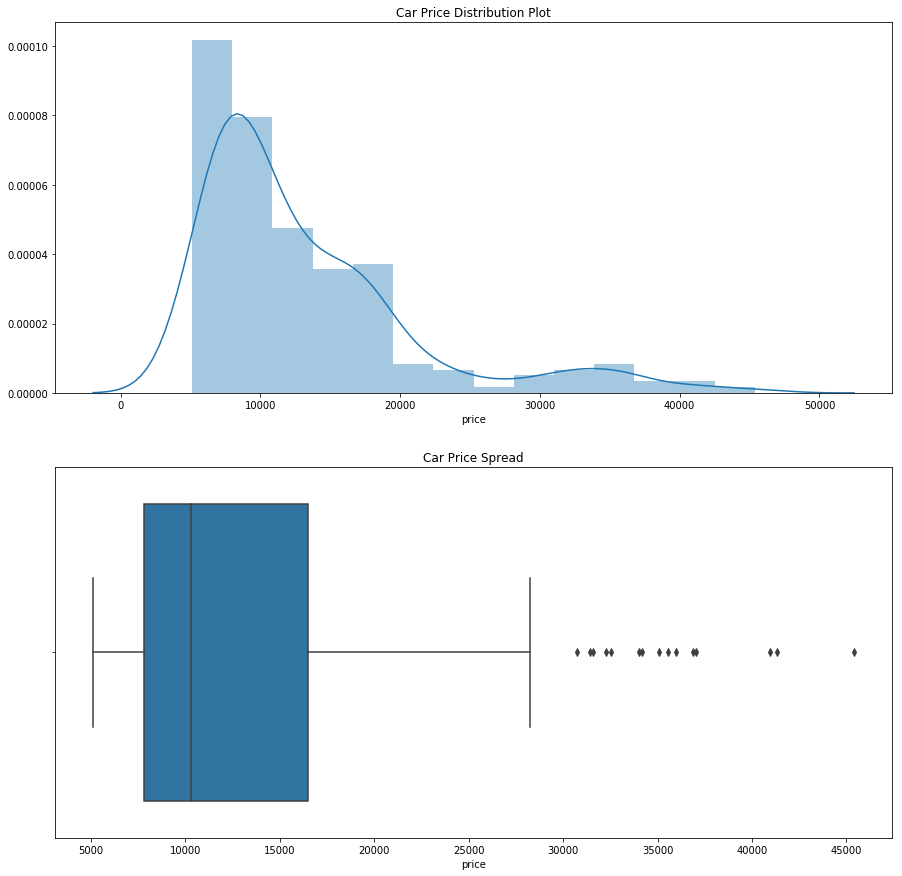

In [158]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.title('Car Price Distribution Plot') 
sns.distplot(cars_data['price'])
plt.subplot(2,1,2)
plt.title('Car Price Spread')
sns.boxplot(cars_data['price'])
plt.show()

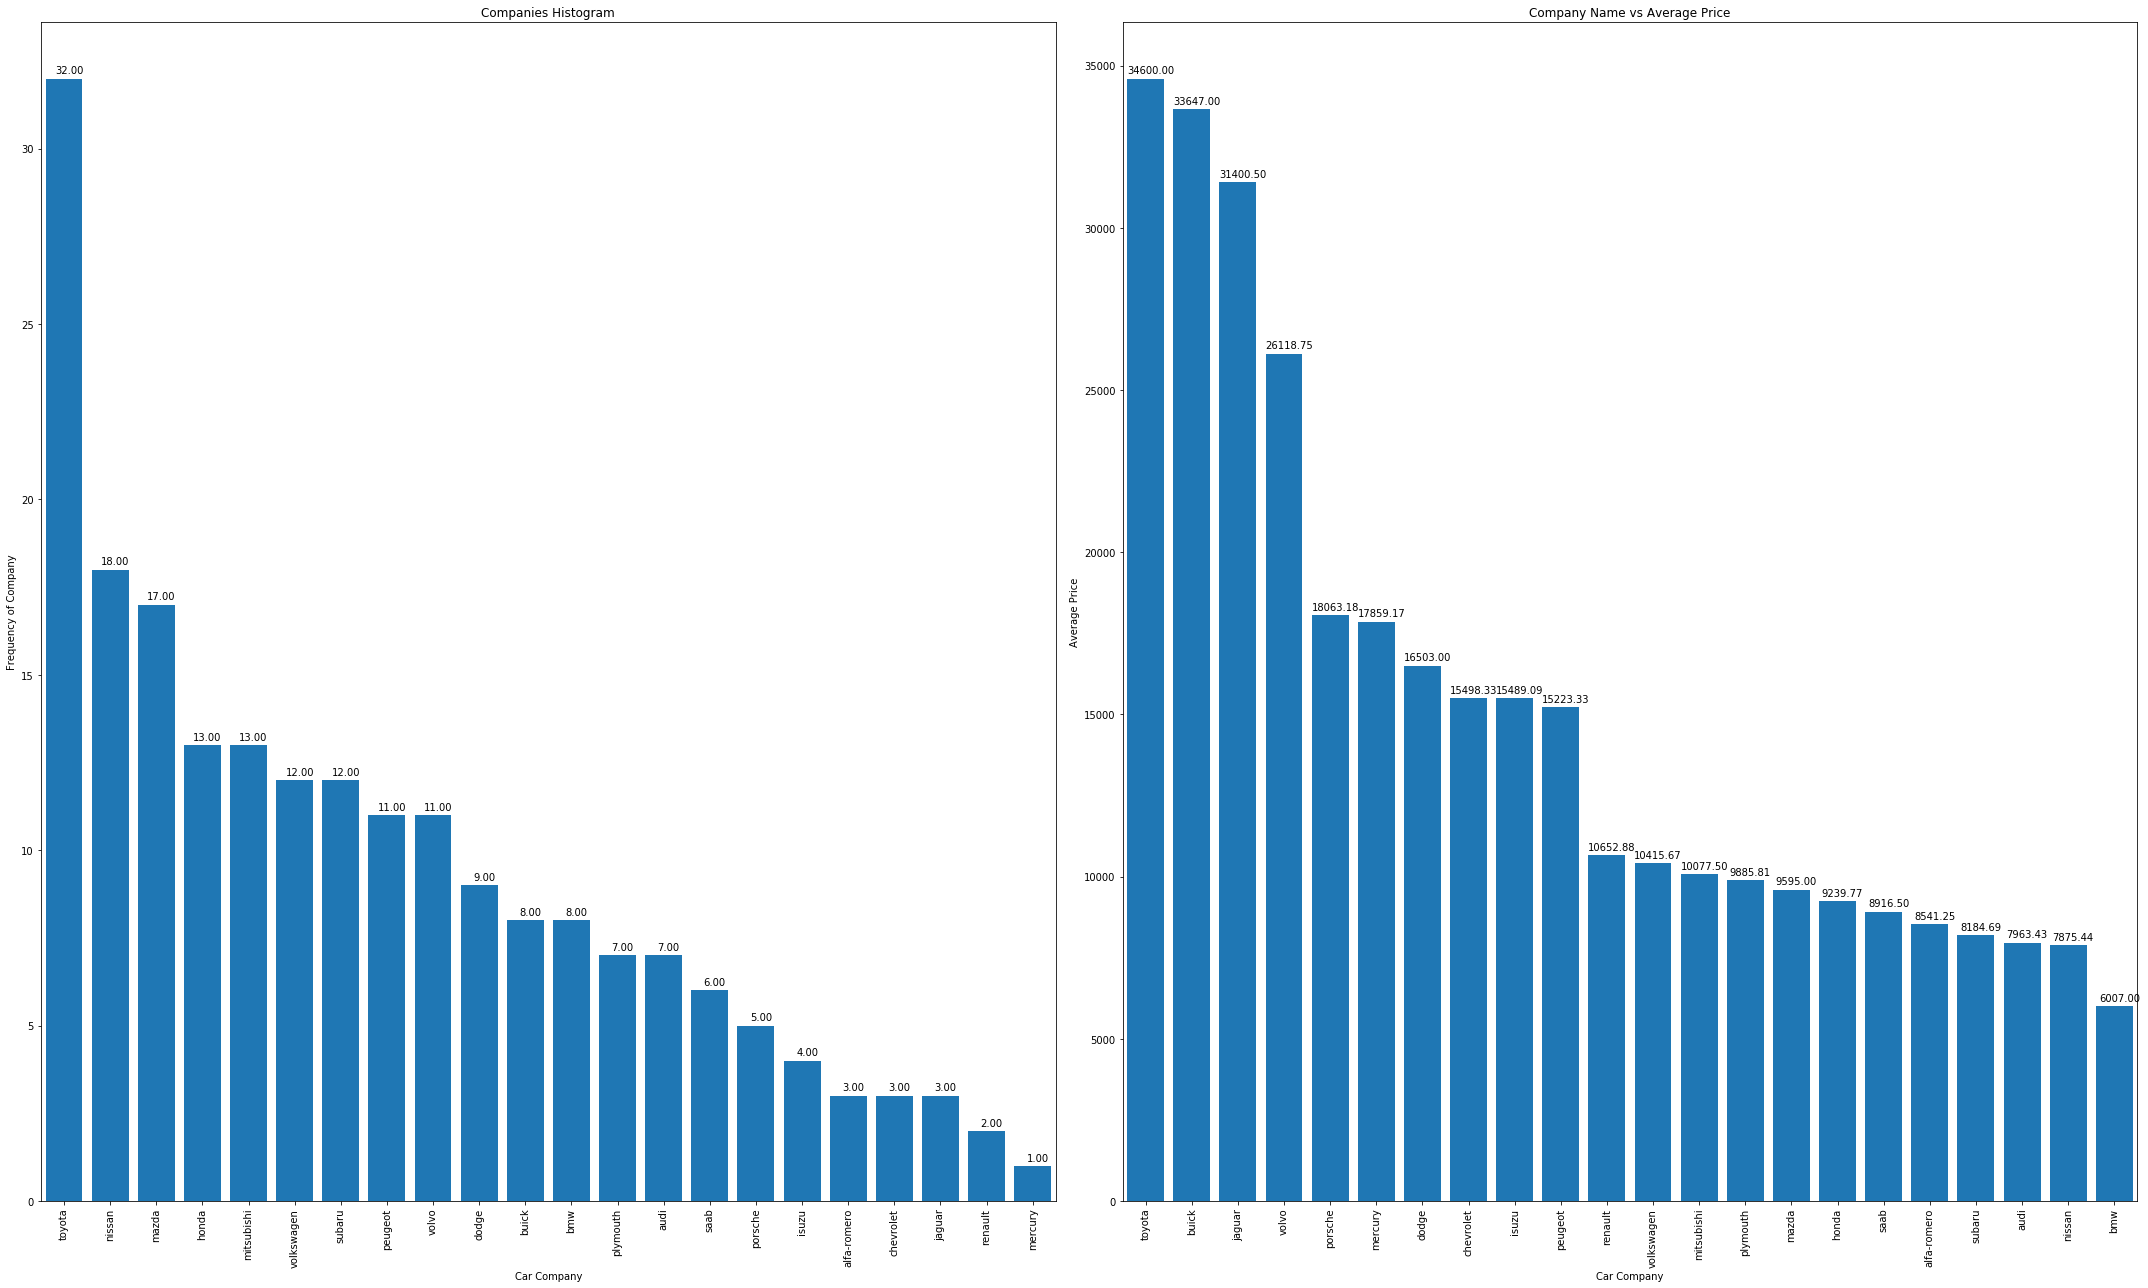

In [159]:
plt.figure(figsize=(30, 18))

plt.subplot(1,2,1)
plt1 = cars_data['Company'].value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car Company', ylabel='Frequency of Company')
xs=cars_data['Company'].unique()
ys=cars_data['Company'].value_counts()
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(5,5),ha='center') 
plt.xticks(xs)

plt.subplot(1,2,2)
company_vs_price = pd.DataFrame(cars_data.groupby(['Company'])['price'].mean().sort_values(ascending = False))
plt2=company_vs_price.index.value_counts().plot('bar')
plt.title('Company Name vs Average Price')
plt2.set(xlabel='Car Company', ylabel='Average Price')
xs=company_vs_price.index
ys=company_vs_price['price'].round(2)
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(5,5),ha='center') 
plt.xticks(xs)
plt.tight_layout()
plt.show()

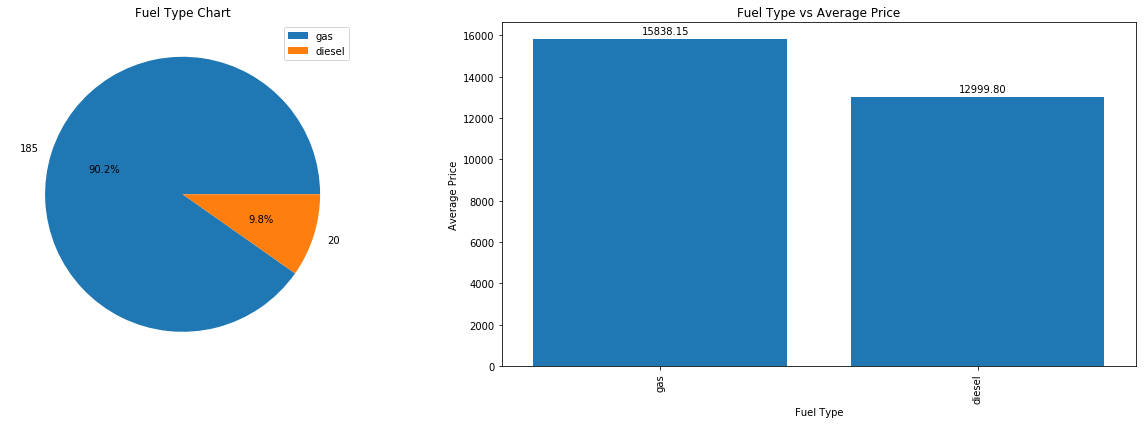

In [160]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.title('Fuel Type Chart')
labels=cars_data['fueltype'].unique()
plt3 = cars_data['fueltype'].value_counts().tolist()
plt.pie(plt3,labels=plt3, autopct='%1.1f%%')
plt.legend(labels)
plt.subplot(1,2,2)
fuel_vs_price = pd.DataFrame(cars_data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
plt4=fuel_vs_price.index.value_counts().plot('bar')
plt.title('Fuel Type vs Average Price')
plt4.set(xlabel='Fuel Type', ylabel='Average Price')
xs=fuel_vs_price.index
ys=fuel_vs_price['price'].round(2)
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(5,5),ha='center') 
plt.xticks(xs)
plt.tight_layout()
plt.show()

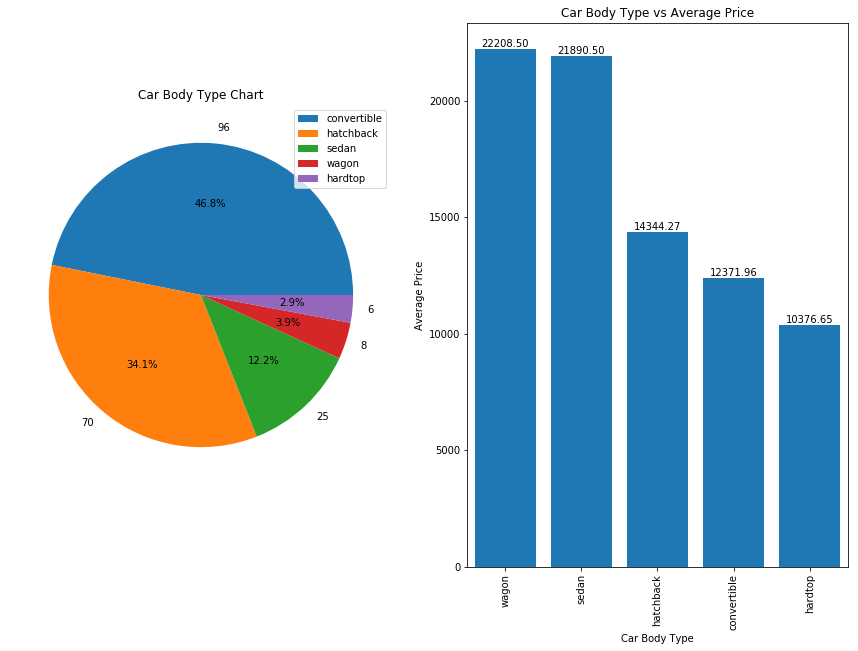

In [161]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Car Body Type Chart')
labels=cars_data['carbody'].unique()
plt5 = cars_data['carbody'].value_counts().tolist()
plt.pie(plt5, labels=plt5, autopct='%1.1f%%')
plt.legend(labels, loc=1)
plt.subplot(1,2,2)
car_vs_price = pd.DataFrame(cars_data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
plt6=car_vs_price.index.value_counts().plot('bar')
plt.title('Car Body Type vs Average Price')
plt6.set(xlabel='Car Body Type', ylabel='Average Price')
xs=car_vs_price.index
ys=car_vs_price['price'].round(2)
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(0,2),ha='center') 
plt.xticks(xs)
plt.show()

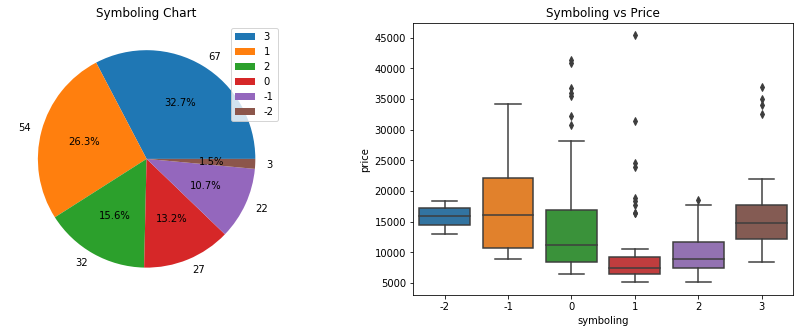

In [162]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Symboling Chart')
labels=cars_data['symboling'].unique()
plt7 = cars_data['symboling'].value_counts().tolist()
plt.pie(plt7, labels=plt7, autopct='%1.1f%%')
plt.legend(labels, loc=1)
plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars_data['symboling'], y=cars_data['price'])
plt.show()

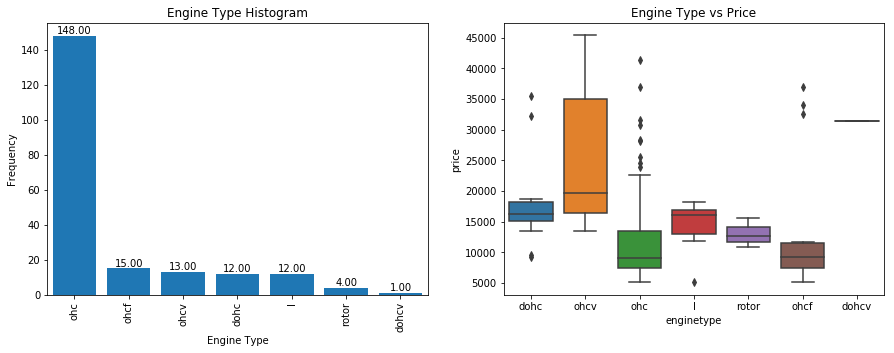

In [163]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt8 = cars_data['enginetype'].value_counts().plot('bar')
plt.title('Engine Type Histogram')
plt8.set(xlabel = 'Engine Type', ylabel='Frequency')
xs=cars_data['enginetype'].unique()
ys=cars_data['enginetype'].value_counts()
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(0,2),ha='center') 
plt.xticks(xs)
plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars_data['enginetype'], y=cars_data['price'])
plt.show()

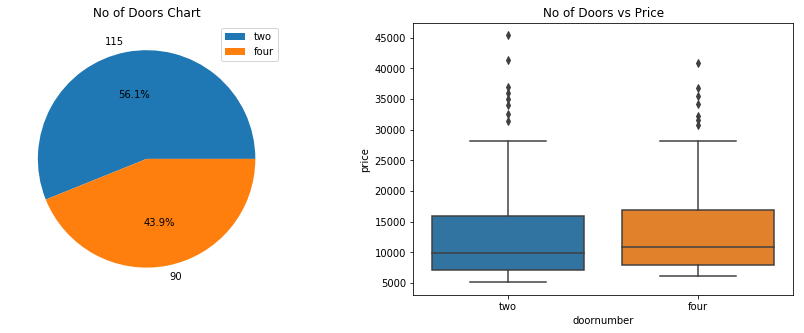

In [164]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
labels=cars_data['doornumber'].unique()
plt8 = cars_data['doornumber'].value_counts().tolist()
plt.title('No of Doors Chart')
plt.pie(plt8, labels=plt8, autopct='%1.1f%%')
plt.legend(labels, loc=1)
plt.subplot(1,2,2)
plt.title('No of Doors vs Price')
sns.boxplot(x=cars_data['doornumber'], y=cars_data['price'])
plt.show()

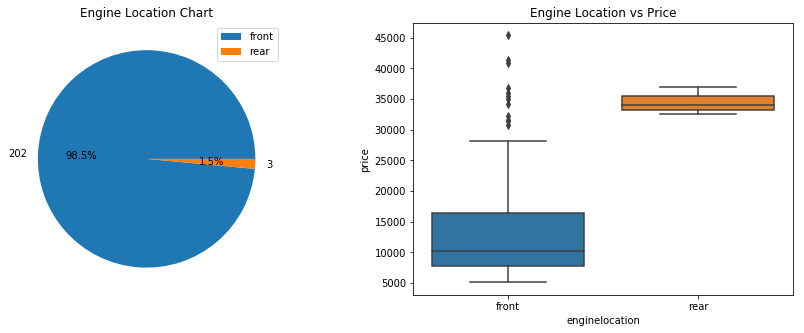

In [166]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
labels=cars_data['enginelocation'].unique()
plt9 = cars_data['enginelocation'].value_counts().tolist()
plt.title('Engine Location Chart')
plt.pie(plt9, labels=plt9, autopct='%1.1f%%')
plt.legend(labels, loc=1)
plt.subplot(1,2,2)
plt.title('Engine Location vs Price')
sns.boxplot(x=cars_data['enginelocation'], y=cars_data['price'])
plt.show()

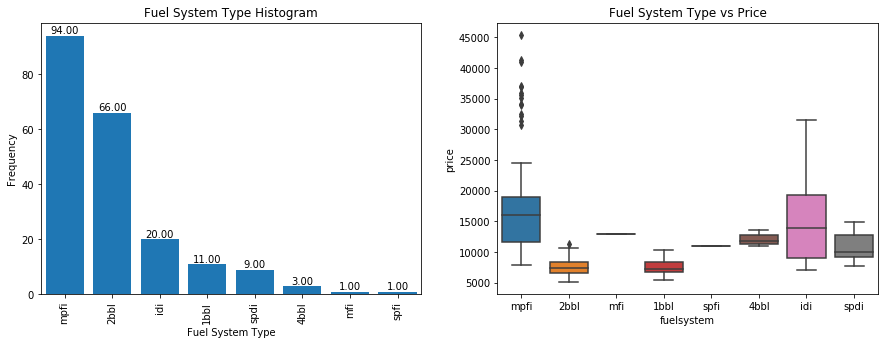

In [167]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt10 = cars_data['fuelsystem'].value_counts().plot('bar')
plt.title('Fuel System Type Histogram')
plt10.set(xlabel = 'Fuel System Type', ylabel='Frequency')
xs=cars_data['fuelsystem'].unique()
ys=cars_data['fuelsystem'].value_counts()
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(0,2),ha='center') 
plt.xticks(xs)
plt.subplot(1,2,2)
plt.title('Fuel System Type vs Price')
sns.boxplot(x=cars_data['fuelsystem'], y=cars_data['price'])
plt.show()

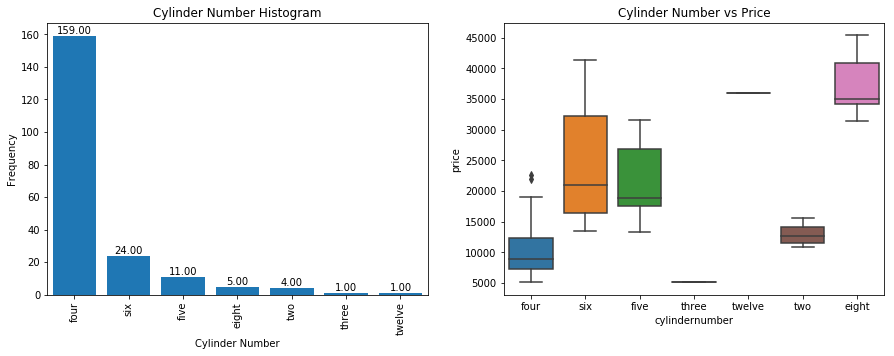

In [168]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt11 = cars_data['cylindernumber'].value_counts().plot('bar')
plt.title('Cylinder Number Histogram')
plt11.set(xlabel = 'Cylinder Number', ylabel='Frequency')
xs=cars_data['cylindernumber'].unique()
ys=cars_data['cylindernumber'].value_counts()
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(0,2),ha='center') 
plt.xticks(xs)
plt.subplot(1,2,2)
plt.title('Cylinder Number vs Price')
sns.boxplot(x=cars_data['cylindernumber'], y=cars_data['price'])
plt.show()

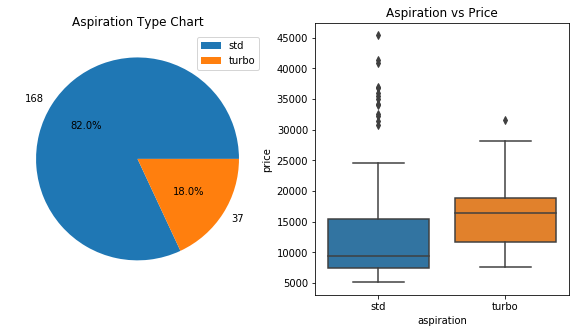

In [169]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
labels=cars_data['aspiration'].unique()
plt12 = cars_data['aspiration'].value_counts().tolist()
plt.title('Aspiration Type Chart')
plt.pie(plt12, labels=plt12, autopct='%1.1f%%')
plt.legend(labels, loc=1)
plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars_data['aspiration'], y=cars_data['price'])
plt.show()

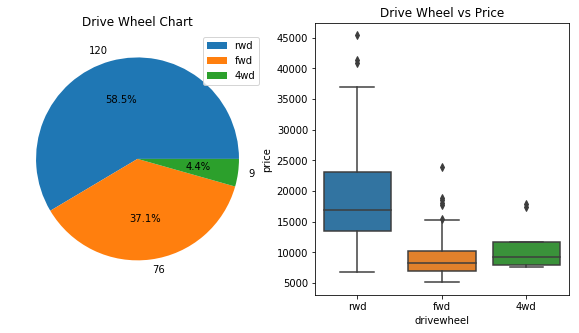

In [170]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
labels=cars_data['drivewheel'].unique()
plt13 = cars_data['drivewheel'].value_counts().tolist()
plt.title('Drive Wheel Chart')
plt.pie(plt13, labels=plt13, autopct='%1.1f%%')
plt.legend(labels, loc=1)
plt.subplot(1,2,2)
plt.title('Drive Wheel vs Price')
sns.boxplot(x=cars_data['drivewheel'], y=cars_data['price'])
plt.show()

In [ ]:
#analysing numeric values

In [171]:
def scatterplot(df,var):
    
    plt.scatter(df[var],df['price'])
    plt.xlabel(var); plt.ylabel('Price')
    plt.title('Scatter Plot for '+var+' vs Price')

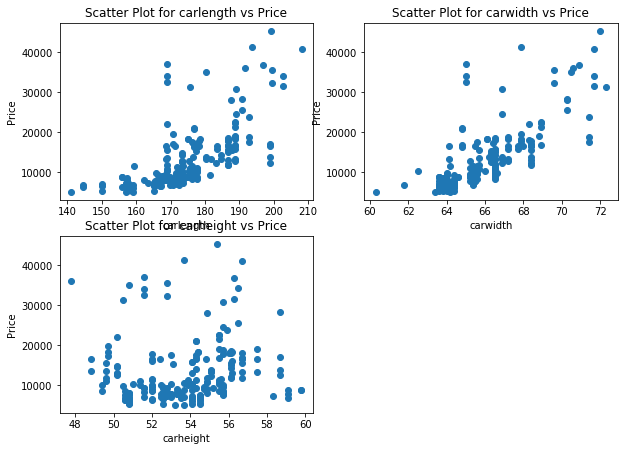

<Figure size 432x288 with 0 Axes>

In [172]:
plt.figure(figsize=(10,15))
plt.subplot(4,2,1)
scatterplot(cars_data,'carlength')    
plt.subplot(4,2,2)
scatterplot(cars_data,'carwidth')
plt.subplot(4,2,3)
scatterplot(cars_data,'carheight')
plt.show()
plt.tight_layout()

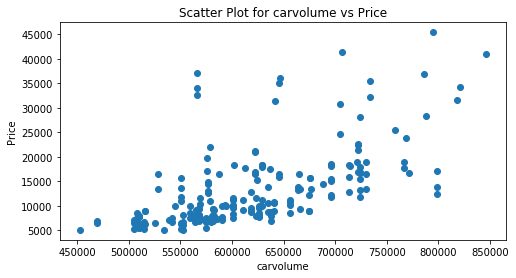

In [173]:
cars_data['carvolume']=cars_data['carlength']*cars_data['carwidth']*cars_data['carheight']    
cars_data['carvolume'].unique()
plt.figure(figsize=(8,4))
scatterplot(cars_data,'carvolume')

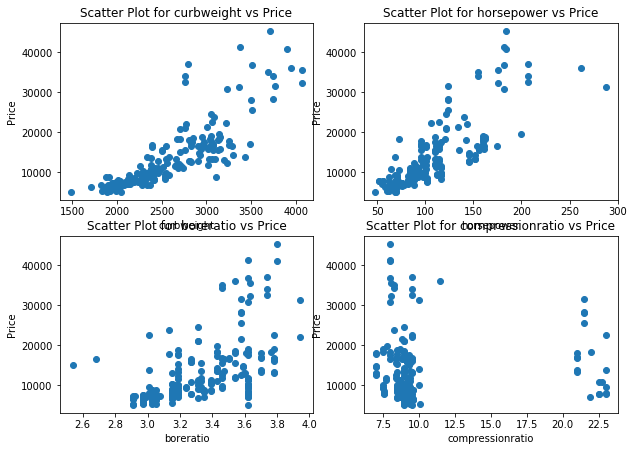

<Figure size 432x288 with 0 Axes>

In [174]:
plt.figure(figsize=(10,15))
plt.subplot(4,2,1)
scatterplot(cars_data,'curbweight')    
plt.subplot(4,2,2)
scatterplot(cars_data,'horsepower')
plt.subplot(4,2,3)
scatterplot(cars_data,'boreratio')
plt.subplot(4,2,4)
scatterplot(cars_data,'compressionratio')
plt.show()
plt.tight_layout()

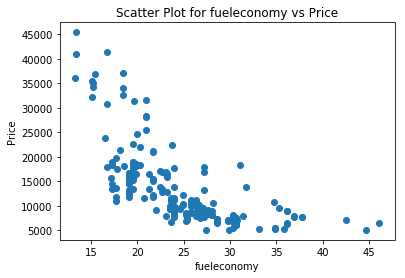

In [175]:
cars_data['fueleconomy']=(cars_data['citympg']*0.50)+(cars_data['highwaympg']*0.40)      
cars_data['fueleconomy'].unique()
scatterplot(cars_data,'fueleconomy')

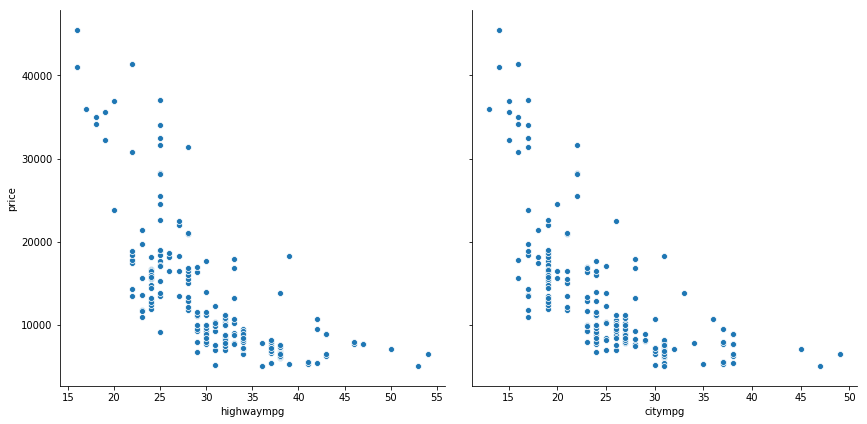

In [176]:
sns.pairplot(cars_data, x_vars=['highwaympg','citympg'], y_vars='price', height=6, aspect=1, kind='scatter')

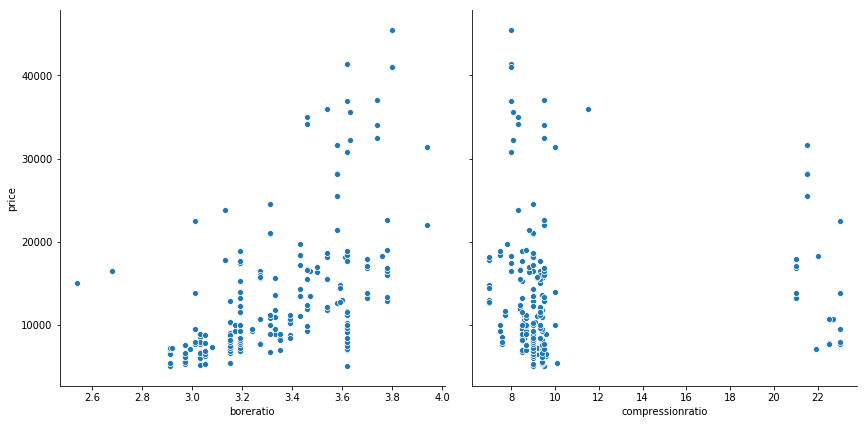

In [177]:
sns.pairplot(cars_data, x_vars=['boreratio','compressionratio'], y_vars='price', height=6, aspect=1, kind='scatter')

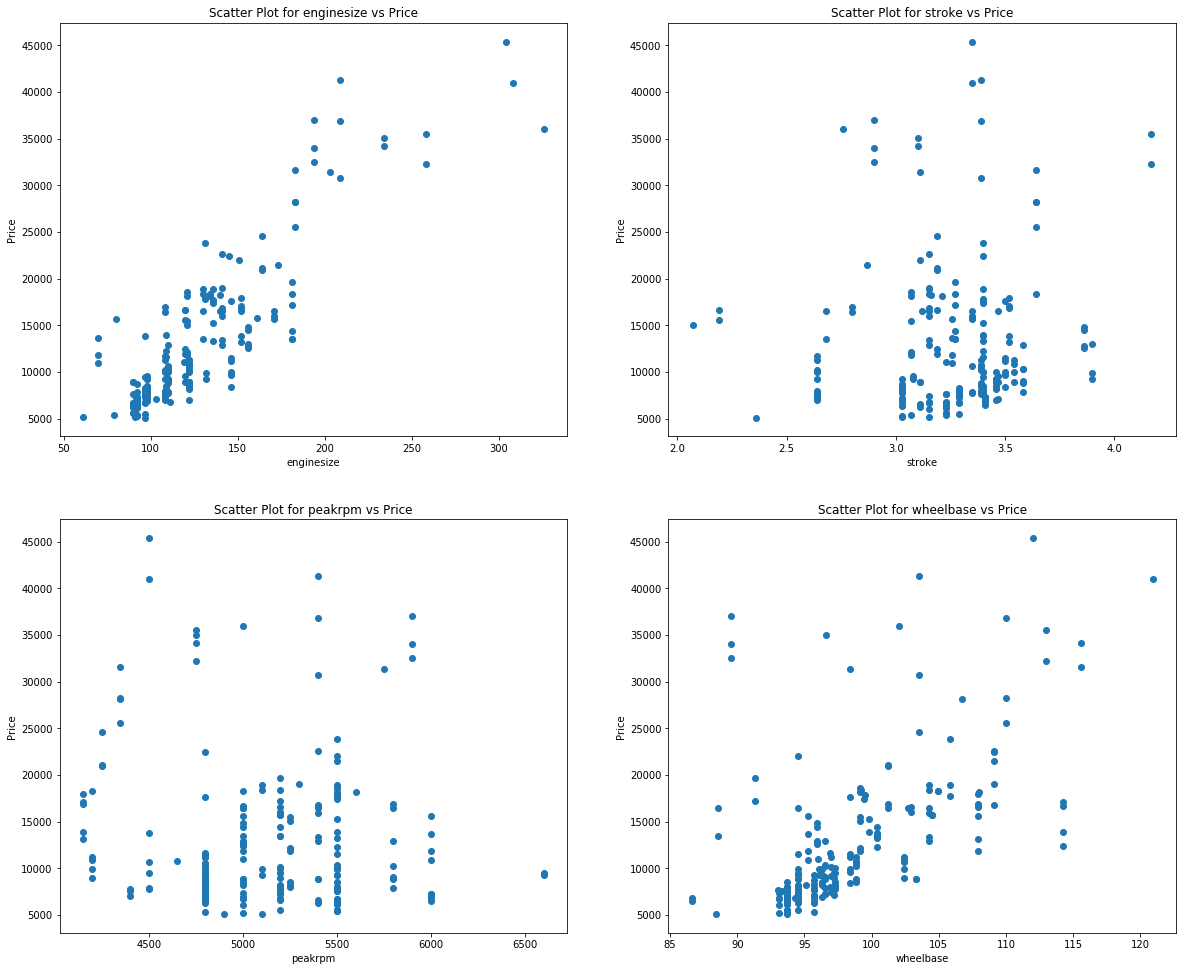

<Figure size 432x288 with 0 Axes>

In [178]:
plt.figure(figsize=(20,35))
plt.subplot(4,2,1)
scatterplot(cars_data,'enginesize')    
plt.subplot(4,2,2)
scatterplot(cars_data,'stroke')
plt.subplot(4,2,3)
scatterplot(cars_data,'peakrpm')
plt.subplot(4,2,4)
scatterplot(cars_data,'wheelbase')
plt.show()
plt.tight_layout()

([<matplotlib.axis.XTick at 0x141295f60b8>,
 <a list of 5 Text xticklabel objects>)

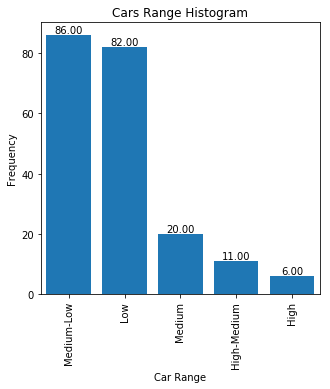

In [231]:
price=cars_data['price'].tolist()
price
carsrange=[]
for i in cars_data['price']:
    if (i>0 and i<9000): carsrange.append('Low')
    elif (i>9000 and i<18000): carsrange.append('Medium-Low')
    elif (i>18000 and i<27000): carsrange.append('Medium')
    elif(i>27000 and i<36000): carsrange.append('High-Medium')
    else : carsrange.append('High')
cars_data['carsrange']=carsrange
cars_data['carsrange'].unique()

#plot
plt.figure(figsize=(5,5))
plt14 = cars_data['carsrange'].value_counts().plot('bar')
plt.title('Cars Range Histogram')
plt14.set(xlabel = 'Car Range', ylabel='Frequency')
xs=cars_data['carsrange'].unique()
ys=cars_data['carsrange'].value_counts()
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points",xytext=(0,2),ha='center') 
plt.xticks(xs)

In [ ]:
#Correlation

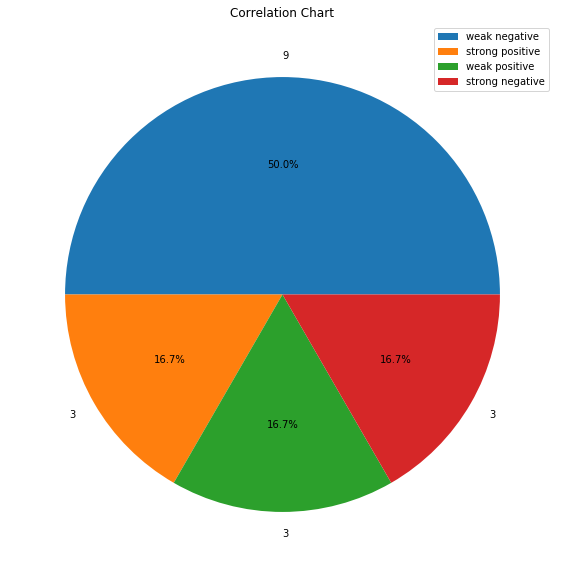

car_ID                weak negative
symboling             weak negative
wheelbase           strong positive
carlength           strong positive
carwidth            strong positive
carheight             weak positive
curbweight          strong positive
enginesize          strong positive
boreratio           strong positive
stroke                weak positive
compressionratio      weak positive
horsepower          strong positive
peakrpm               weak negative
citympg             strong negative
highwaympg          strong negative
price               strong positive
carvolume           strong positive
fueleconomy         strong negative
Name: correlation, dtype: object

In [179]:
corr=cars_data.corr().round(3).loc['price']
corr=pd.DataFrame(corr)
corr
result=[]   
for i in corr['price']:
        if (i>-1 and i<-0.4): result.append('strong negative')
        elif (i>-0.4 and i<-0.2): result.append('moderate negative')
        elif (i>-0.2 and i<0): result.append('weak negative')
        elif(i>0 and i<0.2): result.append('weak positive')
        elif(i>0.2 and i<0.5): result.append('moderate positive')
        else : result.append('strong positive')
corr['correlation']=result
corr['correlation'].value_counts()
plt.figure(figsize=(10,10))
plt.title('Correlation Chart')
labels=corr['correlation'].unique()
plt15 = corr['correlation'].value_counts().tolist()
plt.pie(plt15, labels=plt15, autopct='%1.1f%%')
plt.legend(labels, loc=1)
plt.show()
corr.loc[:,'correlation']

In [ ]:
#regression

In [241]:
cars=cars_data[['price','carsrange','enginetype','fueltype','carbody','aspiration','cylindernumber','carlength','carwidth','drivewheel','curbweight','carvolume','enginesize','boreratio','horsepower','wheelbase','fueleconomy']]
cars.head()

,price,carsrange,enginetype,fueltype,carbody,aspiration,cylindernumber,carlength,carwidth,drivewheel,curbweight,carvolume,enginesize,boreratio,horsepower,wheelbase,fueleconomy
0,13495.0,Medium-Low,dohc,gas,convertible,std,four,168.8,64.1,rwd,2548,528019.904,130,3.47,111,88.6,21.3
1,16500.0,Medium-Low,dohc,gas,convertible,std,four,168.8,64.1,rwd,2548,528019.904,130,3.47,111,88.6,21.3
2,16500.0,Medium-Low,ohcv,gas,hatchback,std,six,171.2,65.5,rwd,2823,587592.640,152,2.68,154,94.5,19.9
3,13950.0,Medium-Low,ohc,gas,sedan,std,four,176.6,66.2,fwd,2337,634816.956,109,3.19,102,99.8,24.0
4,17450.0,Medium-Low,ohc,gas,sedan,std,five,176.6,66.4,4wd,2824,636734.832,136,3.19,115,99.4,17.8


In [242]:
cars.head()

,price,carsrange,enginetype,fueltype,carbody,aspiration,cylindernumber,carlength,carwidth,drivewheel,curbweight,carvolume,enginesize,boreratio,horsepower,wheelbase,fueleconomy
0,13495.0,Medium-Low,dohc,gas,convertible,std,four,168.8,64.1,rwd,2548,528019.904,130,3.47,111,88.6,21.3
1,16500.0,Medium-Low,dohc,gas,convertible,std,four,168.8,64.1,rwd,2548,528019.904,130,3.47,111,88.6,21.3
2,16500.0,Medium-Low,ohcv,gas,hatchback,std,six,171.2,65.5,rwd,2823,587592.640,152,2.68,154,94.5,19.9
3,13950.0,Medium-Low,ohc,gas,sedan,std,four,176.6,66.2,fwd,2337,634816.956,109,3.19,102,99.8,24.0
4,17450.0,Medium-Low,ohc,gas,sedan,std,five,176.6,66.4,4wd,2824,636734.832,136,3.19,115,99.4,17.8


In [243]:
def dummies(x,df):
    var=pd.get_dummies(df[x], drop_first=True)
    df=pd.concat([df,var], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

cars = dummies('fueltype',cars)
cars = dummies('aspiration',cars)
cars = dummies('carbody',cars)
cars = dummies('drivewheel',cars)
cars = dummies('enginetype',cars)
cars = dummies('cylindernumber',cars)
cars = dummies('carsrange',cars)

print(cars.shape)
cars.head()

(205, 34)


,price,carlength,carwidth,curbweight,carvolume,enginesize,boreratio,horsepower,wheelbase,fueleconomy,...,five,four,six,three,twelve,two,High-Medium,Low,Medium,Medium-Low
0,13495.0,168.8,64.1,2548,528019.904,130,3.47,111,88.6,21.3,...,0,1,0,0,0,0,0,0,0,1
1,16500.0,168.8,64.1,2548,528019.904,130,3.47,111,88.6,21.3,...,0,1,0,0,0,0,0,0,0,1
2,16500.0,171.2,65.5,2823,587592.640,152,2.68,154,94.5,19.9,...,0,0,1,0,0,0,0,0,0,1
3,13950.0,176.6,66.2,2337,634816.956,109,3.19,102,99.8,24.0,...,0,1,0,0,0,0,0,0,0,1
4,17450.0,176.6,66.4,2824,636734.832,136,3.19,115,99.4,17.8,...,1,0,0,0,0,0,0,0,0,1


In [244]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test=train_test_split(cars, train_size=0.6, test_size=0.4, random_state=100)

df_train.head() #training set
df_test.head() #test set

from sklearn.preprocessing import MinMaxScaler #feature scaling 
scaler=MinMaxScaler()

high_corr=df_train.corr().loc[df_train.corr()['price']>0.75]['price']  #highly correlated values with price
high=high_corr.index.drop('price').tolist()

low_corr=df_train.corr().loc[df_train.corr()['price']<-0.45]['price']
low=low_corr.index.tolist()

num_vars=high+low
num_vars
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()
df_train.describe().round(2)

#splitting into x and y 
y_train=df_train.pop('price')
x_train=df_train


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [245]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

model=LinearRegression()
model.fit(x_train, y_train)
rfe=RFE(model,15)
rfe=rfe.fit(x_train, y_train)

selected_features=list(zip(x_train.columns,rfe.support_,rfe.ranking_)) #checking the selected features
selected_features

index=x_train.columns[rfe.support_]
x_train_new=x_train[index]
x_train_new.head()

def buildmodel(x,y):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())
    return x

In [246]:
model_1=buildmodel(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     290.8
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           2.33e-79
Time:                        15:12:49   Log-Likelihood:                -1048.7
No. Observations:                 123   AIC:                             2129.
Df Residuals:                     107   BIC:                             2174.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.873e+04   2668.315     14.515      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [247]:
x_train_new=x_train_new.drop(['dohcv'], axis=1)
model_2=buildmodel(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           3.27e-80
Time:                        15:13:13   Log-Likelihood:                -1049.8
No. Observations:                 123   AIC:                             2130.
Df Residuals:                     108   BIC:                             2172.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.839e+04   2667.226     14.393      

In [248]:
x_train_new=x_train_new.drop(['two'],axis=1)
model_3=buildmodel(x_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     326.9
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           7.27e-81
Time:                        15:13:59   Log-Likelihood:                -1051.4
No. Observations:                 123   AIC:                             2131.
Df Residuals:                     109   BIC:                             2170.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.734e+04   2616.716     14.270      

In [249]:
x_train_new=x_train_new.drop(['three'],axis=1)
model_4=buildmodel(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     346.9
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.86e-81
Time:                        15:14:43   Log-Likelihood:                -1053.2
No. Observations:                 123   AIC:                             2132.
Df Residuals:                     110   BIC:                             2169.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.686e+04   2629.118     14.019      

In [250]:
f_model=model_4

In [251]:
def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [252]:
checkVIF(model_4)

,Features,VIF
0,const,474.44
10,Low,28.22
12,Medium-Low,22.32
2,enginesize,14.54
1,curbweight,7.48
11,Medium,7.28
7,six,7.02
6,four,6.20
9,High-Medium,5.72
8,twelve,3.38


In [253]:
model_new=model_4.drop(['Low','Medium-Low','enginesize'], axis=1)
model_5=buildmodel(model_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     92.05
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           8.19e-48
Time:                        15:15:54   Log-Likelihood:                -1147.9
No. Observations:                 123   AIC:                             2316.
Df Residuals:                     113   BIC:                             2344.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6420.5321   4409.924      1.456      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [254]:
model_new=model_5.drop(['boreratio','five','six'], axis=1)
model_6=buildmodel(model_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     136.6
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           3.61e-50
Time:                        15:16:23   Log-Likelihood:                -1149.9
No. Observations:                 123   AIC:                             2314.
Df Residuals:                     116   BIC:                             2333.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7125.0728   1113.385      6.399      

In [255]:
checkVIF(model_6)

,Features,VIF
0,const,18.63
1,curbweight,2.13
3,four,1.97
5,High-Medium,1.65
2,ohcv,1.41
6,Medium,1.35
4,twelve,1.22


In [209]:
final_rm=model_6

In [256]:
model_check=model_6.drop(['ohcv'], axis=1)
model_check=buildmodel(model_check, y_train)
checkVIF(model_check)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     156.6
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           4.08e-50
Time:                        15:16:54   Log-Likelihood:                -1152.8
No. Observations:                 123   AIC:                             2318.
Df Residuals:                     117   BIC:                             2334.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6726.4504   1121.706      5.997      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Features,VIF
0,const,18.20
1,curbweight,2.12
2,four,1.84
4,High-Medium,1.65
5,Medium,1.33
3,twelve,1.12


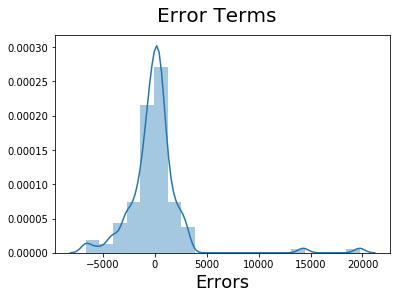

In [259]:
lm=sm.OLS(y_train,model_check).fit()
y_train_price=lm.predict(model_check)

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

In [260]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [261]:
y_test=df_test.pop('price')
x_test=df_test

In [268]:
x_train_new=model_check.drop('const', axis=1)

In [269]:
x_test_new=x_test[x_train_new.columns]

In [270]:
x_test_new=sm.add_constant(x_test_new)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


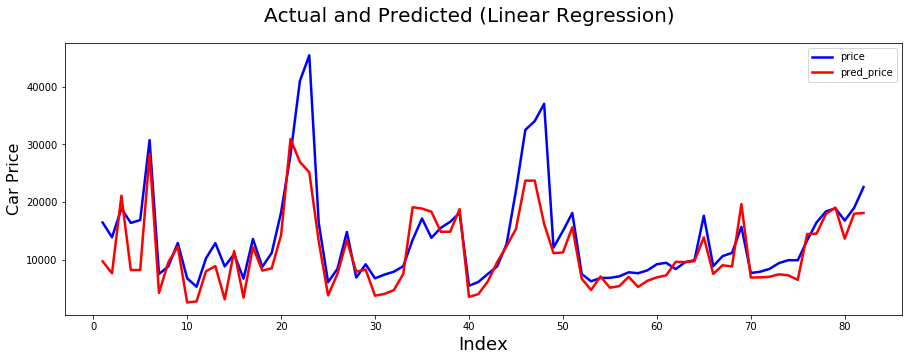

In [271]:
y_pred=lm.predict(x_test_new)
price=pd.concat([y_test,y_pred.round(2)],axis=1)
price=price.rename(columns={0:'pred_price'}) #price prediction using linear regression
price=price.sort_index()
price=price.reset_index(0)

c= [i for i in range(1,83,1)] # generating index 
fig = plt.figure(figsize=(15,5)) 
plt.plot(c,price['price'], color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,price['pred_price'], color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted (Linear Regression)', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label
plt.legend()
plt.show()

In [275]:
from sklearn.metrics import r2_score 
acc=r2_score(y_test, y_pred)
print('The Accuracy Score is : ',(acc*100).round(3),'%') #Accuracy Score with Linear Regression

The Accuracy Score is :  64.377 %


In [279]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

rf_pred=pd.Series(rf.predict(x_test)) #price prediction using random forest 
rf_pred
acc_rf=r2_score(y_test, rf_pred)
print('The Accuracy Score is : ',(acc_rf*100).round(3),'%') #Accuracy Score with Random Forest Regressor

The Accuracy Score is :  70.437 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


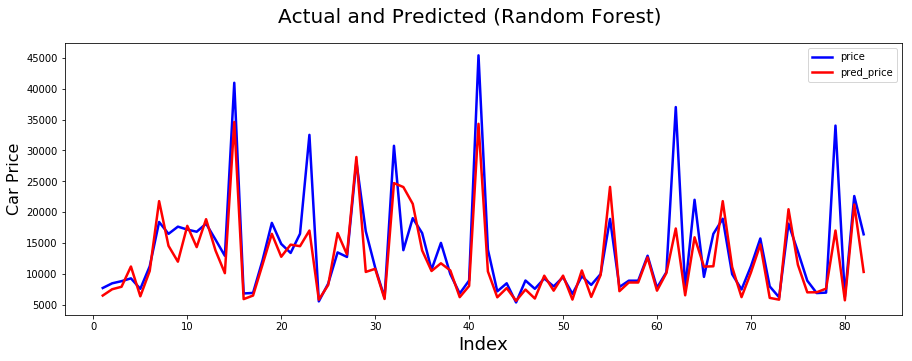

In [280]:
c= [i for i in range(1,83,1)] # generating index 
fig = plt.figure(figsize=(15,5)) 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-", label='price') #Plotting Actual
plt.plot(c,rf_pred, color="red",  linewidth=2.5, linestyle="-", label='pred_price') #Plotting predicted
fig.suptitle('Actual and Predicted (Random Forest)', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                                # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label
plt.legend()
plt.show()

Text(0, 0.5, 'y_pred')

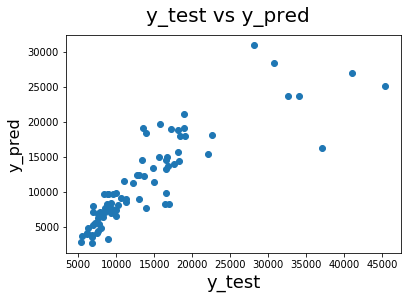

In [281]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'rf_pred')

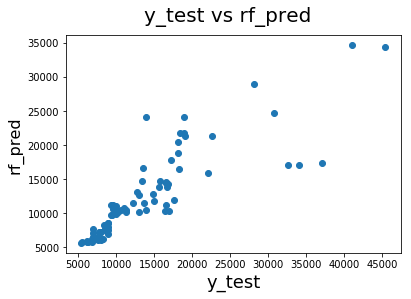

In [282]:
fig = plt.figure()
plt.scatter(y_test,rf_pred)
fig.suptitle('y_test vs rf_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('rf_pred', fontsize=16)                          # Y-label